In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.regularizers import l2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import Callback

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import seaborn as sns

In [5]:
model = load_model('./hyp_tuned_model')

In [4]:
datagen = ImageDataGenerator(
    rotation_range=15,      # Randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # Randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1, # Randomly shift images vertically (fraction of total height)
    horizontal_flip=True,   # Randomly flip images horizontally
    zoom_range=0.1, 
    shear_range=0.1 
)

In [8]:
(x_train_full, y_train_full), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

x_train, x_val, y_train, y_val = train_test_split(
    x_train_full, y_train_full, test_size=0.2, random_state=42
)

x_train = x_train.astype('float32') / 255.0
x_val = x_val.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [14]:
model.compile(
    optimizer=model.optimizer,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [6]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5)

In [8]:
model.fit(
    datagen.flow(x_train, y_train, batch_size=64),
    epochs=50,
    validation_data=(x_val, y_val),
    callbacks=[stop_early]  
)

Epoch 1/50
625/625 [==============================] - 21s 34ms/step - loss: 0.9390 - accuracy: 0.7543 - val_loss: 0.8649 - val_accuracy: 0.8020
Epoch 2/50
625/625 [==============================] - 22s 34ms/step - loss: 0.9073 - accuracy: 0.7639 - val_loss: 0.8320 - val_accuracy: 0.8025
Epoch 3/50
625/625 [==============================] - 21s 33ms/step - loss: 0.8883 - accuracy: 0.7735 - val_loss: 0.7405 - val_accuracy: 0.8299
Epoch 4/50
625/625 [==============================] - 21s 33ms/step - loss: 0.8783 - accuracy: 0.7750 - val_loss: 0.8890 - val_accuracy: 0.7880
Epoch 5/50
625/625 [==============================] - 21s 33ms/step - loss: 0.8572 - accuracy: 0.7814 - val_loss: 0.7425 - val_accuracy: 0.8275
Epoch 6/50
625/625 [==============================] - 21s 33ms/step - loss: 0.8487 - accuracy: 0.7828 - val_loss: 0.7317 - val_accuracy: 0.8310
Epoch 7/50
625/625 [==============================] - 21s 34ms/step - loss: 0.8439 - accuracy: 0.7847 - val_loss: 0.7872 - val_accuracy:

In [9]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

Test Loss: 0.7343
Test Accuracy: 0.8317


In [11]:
with tf.device('/GPU:0'):
    y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

report = classification_report(y_test, y_pred_classes, target_names=[
    "airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"
])
print(f"\nClassification Report:\n{report}")

313/313 [==============================] - 2s 5ms/step

Classification Report:
              precision    recall  f1-score   support

    airplane       0.80      0.89      0.84      1000
  automobile       0.88      0.95      0.92      1000
        bird       0.88      0.71      0.79      1000
         cat       0.78      0.59      0.67      1000
        deer       0.80      0.83      0.82      1000
         dog       0.83      0.69      0.75      1000
        frog       0.74      0.94      0.83      1000
       horse       0.83      0.92      0.87      1000
        ship       0.92      0.89      0.91      1000
       truck       0.86      0.91      0.88      1000

    accuracy                           0.83     10000
   macro avg       0.83      0.83      0.83     10000
weighted avg       0.83      0.83      0.83     10000



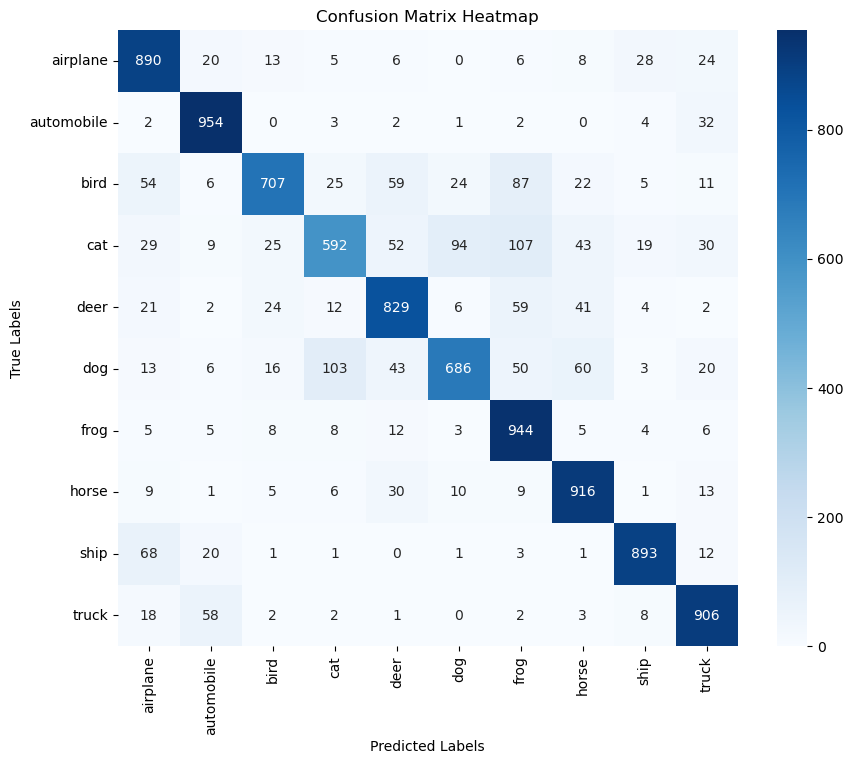

In [14]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=[
    "airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"
], yticklabels=[
    "airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"
])
plt.title("Confusion Matrix Heatmap")
plt.ylabel("True Labels")
plt.xlabel("Predicted Labels")
plt.show()

In [15]:
model.save('models/savemodel/data_aug_model')

INFO:tensorflow:Assets written to: ./data_aug_model\assets


INFO:tensorflow:Assets written to: ./data_aug_model\assets
